In [2]:
import pandas as pd

df = pd.read_csv('./data/cleaned/consumption_temp_w_features.csv')


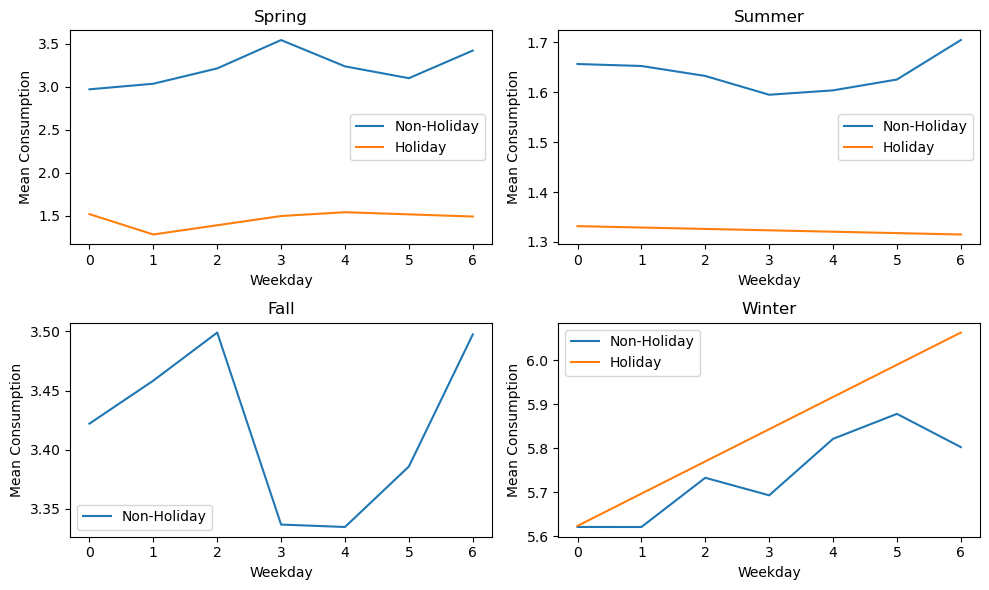

In [3]:
import matplotlib.pyplot as plt

grouped_df = df.groupby(['season', 'weekday', 'is_holiday'])['consumption'].mean().reset_index()

# Define a dictionary for season names
season_names = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjust the size as needed
axs = axs.flatten()  # Flatten to a 1D array for easy indexing

for i, season in enumerate(season_names):
    # Filter data for the specific season
    season_df = grouped_df[grouped_df['season'] == season]

    # Plot data for the current season
    for (key,), grp in season_df.groupby(['is_holiday']):
        label = "Holiday" if key else "Non-Holiday"
        grp.plot(ax=axs[i], kind='line', x='weekday', y='consumption', label=label)

    axs[i].legend(loc='best')
    axs[i].set_title(season_names[season])
    axs[i].set_xlabel('Weekday')
    axs[i].set_ylabel('Mean Consumption')

plt.tight_layout()
plt.show()


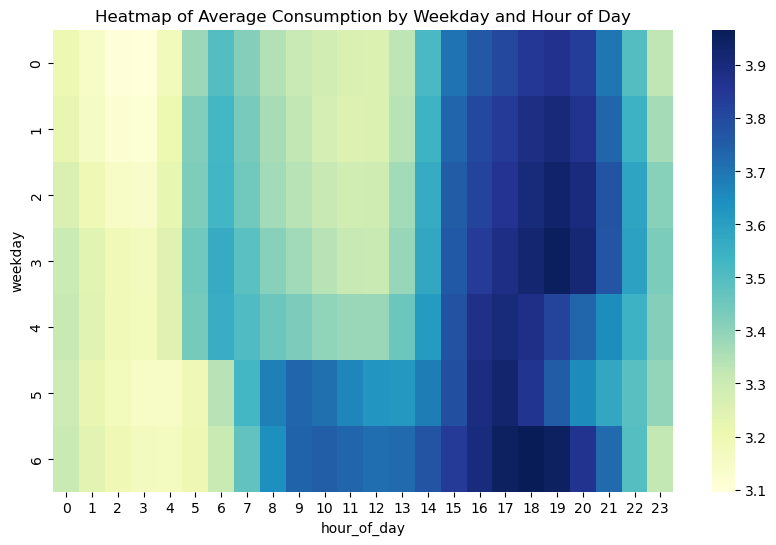

In [4]:
# Group data
grouped_df = df.groupby(['weekday', 'hour_of_day'])['consumption'].mean().reset_index()

# Pivot the data - 'weekday' as index, 'hour_of_day' as columns and 'consumption' as values
pivot_df = pd.pivot_table(grouped_df, values='consumption', index='weekday', columns='hour_of_day')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title('Heatmap of Average Consumption by Weekday and Hour of Day')
plt.show()

# The heatmap tells us that
# - consumption is generally low every night
# - consumption is generally lower on workdays, goes a bit up in the early 
#   morning, then goes down again around 7/8 am, when people presumably go to 
#   work/school. Consumption then goes up again in the evening, when people
#   presumably come home from work/school.
# - consumption is generally higher on weekends 

